In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 5


from scipy import stats

In [2]:
dfb = pd.read_excel('codons_ravel.xlsx', index_col=0)
dfb = dfb[(dfb.num >= 10) & (dfb.num <= 72)]

stop_color = 'gray'

table = { 
            '_':'stop',
            'H':'basic', 'R':'basic', 'K':'basic',
            'A':'aliphatic', 'G':'aliphatic', 'I':'aliphatic', 'L':'aliphatic', 'P':'aliphatic', 'V':'aliphatic',
            'F':'aromatic', 'W':'aromatic', 'Y':'aromatic',
            'D':'acidic', 'E':'acidic',
            'S':'hydroxylic', 'T':'hydroxylic',
            'C':'sulfur', 'M':'sulfur',
            'N':'amidic', 'Q':'amidic'}

dfr = pd.read_excel('../2020-06-30_MAGE-Seq/codons_ravel.xlsx', index_col=0)
#dfr = dfr[(dfr.num >= 10) & (dfr.num <= 72)]

dfs = pd.read_excel('../2021-06-16_MAGEseq_SHX/codons_ravel.xlsx', index_col=0)
dfs = dfs[(dfs.num >= 10) & (dfs.num <= 72)]

df = dfs.merge(dfb, on='Label')
df = df.merge(dfr, on='Label')

In [ ]:
#save subset of data to excel

In [25]:
subset = df[['Label', 'fc_fit', 'p_fit', 'fc_fit_x', 'p_fit_x', 'fc_fit_y', 'p_fit_y', 'fc_fitlong', 'p_fitlong', 'fc_rif', 'p_rif', 'fc_shx', 'p_shx', 'fc_fulow', 'p_fulow', 'fc_fuhigh', 'p_fuhigh', 'fc_bcmlow', 'p_bcmlow', 'fc_bcmhigh', 'p_bcmhigh', 'AA', 'num', 'type', 'stop_codon']]
subset = subset.loc[subset.Label.isin(['21Y', '25C', '25D', '26V', '29K', '23P', '23W', '15G', '67V', '15Y', '26V', '27W', '15P', '12K', '33K', '26Y', '67A', '67C', '72L'])]

In [26]:
writer = pd.ExcelWriter('codons_ravel_subset.xlsx', engine='xlsxwriter')

subset.to_excel(writer)
    
writer.save()

In [11]:
writer = pd.ExcelWriter('codons_ravel_all.xlsx', engine='xlsxwriter')

df.to_excel(writer)
    
writer.save()

In [63]:
df.columns

Index(['Label', 't01_x', 't02_x', 'lb01_x', 'lb02_x', 'lb03_x', 'shx01',
       'shx02', 'shx03', 'fit01', 'fit02', 'fit03', 't0_mean_x', 't0_sd_x',
       'lb_mean_x', 'lb_sd_x', 'shx_mean', 'shx_sd', 'fit_mean', 'fit_sd',
       'fc_shx', 'fc_fit_x', 'fc_fitlong', 'p_shx', 'p_fit_x', 'p_fitlong',
       'AA_x', 'num_x', 'type_x', 'Label2_x', 'stop_codon_x', 't01_y', 't02_y',
       'lb01_y', 'lb02_y', 'lb03_y', 'bcm01', 'bcm02', 'bcm03', 'bcm04',
       'bcm05', 'bcm06', 'fu01', 'fu02', 'fu03', 'fu04', 'fu05', 'fu06',
       't0_mean_y', 't0_sd_y', 'lb_mean_y', 'lb_sd_y', 'bcmlow_mean',
       'bcmlow_sd', 'bcmhigh_mean', 'bcmhigh_sd', 'fulow_mean', 'fulow_sd',
       'fuhigh_mean', 'fuhigh_sd', 'fc_bcmlow', 'fc_bcmhigh', 'fc_fulow',
       'fc_fuhigh', 'fc_fit_y', 'p_bcmlow', 'p_bcmhigh', 'p_fulow', 'p_fuhigh',
       'p_fit_y', 'AA_y', 'num_y', 'type_y', 'Label2_y', 'stop_codon_y', 't01',
       't02', 'lb01', 'lb02', 'lb03', 'rif01', 'rif02', 'rif03', 't0_mean',
       't0_sd', 'l

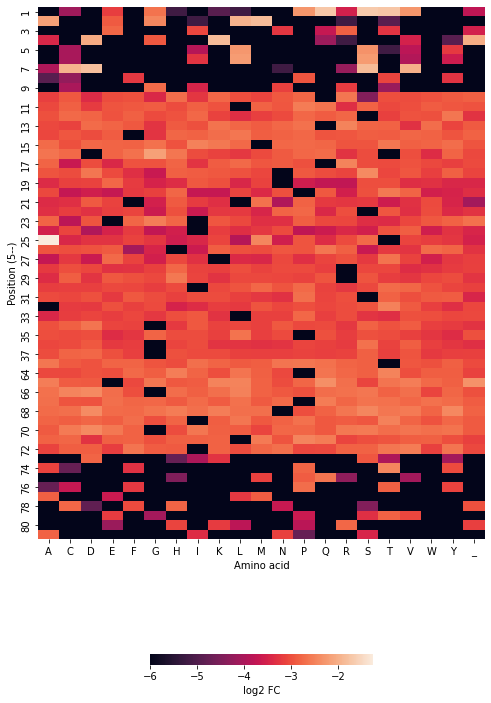

In [76]:
def safe_ln(x, minval=0.000001):
    return np.log10(x.clip(minval))

dfb = pd.read_excel('codons_ravel.xlsx', index_col=0)

for b in ['t0_mean']:
    p = dfb.pivot(index='num', columns='AA', values=b)
    plt.figure(figsize = (8, 14))
    #bwr, RdYlBu_r, coolwarm, vlag, seismic
    ax = sns.heatmap(safe_ln(p), cbar_kws={'label': 'log2 FC', 'shrink':0.5, 'orientation':'horizontal'})

    ax.set_ylabel('Position (5--)')
    ax.set_xlabel('Amino acid')

    plt.show()

In [ ]:
#heatmap

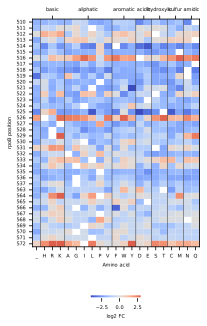

In [12]:
for b in ['fc_rif']:
    p = df.pivot(index='num', columns='AA', values=b)
    p = p.replace([-np.inf], p[~np.isinf(p)].min().min())
    p = p.replace([np.inf], p[~np.isinf(p)].max().max())
    #zscore
    #p = p.subtract(p.mean().mean()).divide(p.std().std())
    p.index = p.index+500
    
    plt.figure(figsize = (3, 6))
    #bwr, RdYlBu_r, coolwarm, vlag, seismic
    ax = sns.heatmap(p[table], center=0, vmin=-4, vmax=3, cmap="coolwarm", cbar_kws={'label': 'log2 FC', 'shrink':0.3, 'orientation':'horizontal'})

    ax.set_ylabel('rpoB position')
    ax.set_xlabel('Amino acid')
    ax.vlines([1, 4, 10, 13, 15, 17, 19, 21], *ax.get_ylim(), linewidths=.4, color='k')

    ax1 = ax.twiny()
    #ax1.set_xlim([-1,63])
    #ax1.set_xticks(range(0, 63, 1))
    ax1.set_xlim([0, 21])
    ax1.set_xticks([2.5, 7, 11.5, 14, 16, 18, 20])
    #ax1.set_xticklabels(target[37:55])
    ax1.set_xticklabels(['basic', 'aliphatic', 'aromatic', 'acidic', 'hydroxylic', 'sulfur', 'amidic'])
    
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
    
    plt.savefig('svg/3a.svg', format="svg")
    
    plt.show()

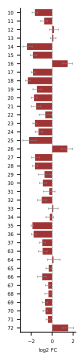

In [4]:
temps = []

for var in ['fc_rif']:
    #var = 'rif'

    plt.figure(figsize = (1, 6))

    features = [var, 'stop_codon', 'num']
    tdf = df.loc[:, features].dropna()
    tdf = tdf[~tdf.stop_codon]

    x = tdf.loc[:, var]
    x = x.replace([-np.inf], x[~np.isinf(x)].min())
    x = x.replace([np.inf], x[~np.isinf(x)].max())
    tdf.loc[:, var] = x

    temps.append(tdf.loc[:, [var, 'num']].groupby('num').mean())

    ax = sns.barplot(x=var, y='num', data=tdf, orient='h', color='firebrick', errcolor='gray', errwidth='.5', capsize=.2)
    sns.despine()
    ax.set_xlabel('log2 FC')
    ax.set_ylabel('')
    #ax.set_xlim(-5, 2.5)
    ax.axvline(0, ls='--', c='gray', lw='.5')
    
    plt.savefig('svg/3b.svg', format="svg")
    plt.show()

In [322]:
pd.concat(temps, axis=1).to_csv('values.csv')

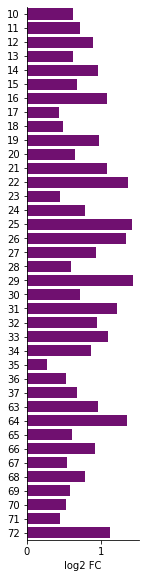

In [124]:
temps = []

for var in ['fc_rif']:
    #var = 'rif'

    plt.figure(figsize = (2, 9.8))

    features = [var, 'stop_codon', 'num']
    tdf = df.loc[:, features].dropna()
    tdf = tdf[~tdf.stop_codon]

    x = tdf.loc[:, var]
    x = x.replace([-np.inf], x[~np.isinf(x)].min().min())
    x = x.replace([np.inf], x[~np.isinf(x)].max().max())
    tdf.loc[:, var] = x
    
    variance = tdf.loc[:, [var, 'num']].groupby('num').std()
    
    #temps.append(tdf.loc[:, [var, 'num']].groupby('num').mean())

    ax = sns.barplot(x=variance[var], y=variance.index, data=variance, orient='h', color='purple', errcolor='gray', errwidth='1', capsize=.2)
    sns.despine()
    ax.set_xlabel('log2 FC')
    ax.set_ylabel('')
    #ax.set_xlim(-5, 2.5)
    ax.axvline(0, ls='--', c='gray', lw='.5')
    plt.show()

In [42]:
tdf = tdf.reset_index()

In [74]:
maxx = tdf.iloc[tdf.groupby('num')[var].apply(lambda x: x.abs().idxmax()), [3, 1]]

In [107]:
y = tdf.loc[:, [var, 'num']].groupby('num').mean().values.flatten()

In [110]:
maxx.loc[:, var] = maxx.loc[:, var].divide(y)

In [27]:
#scatter

In [29]:
df.loc[df.Label == '25D', 'fc_fit']

317   -0.81689
Name: fc_fit, dtype: float64

percent less than boundary: 0.7684210526315789


/tmp/ipykernel_3116695/447289225.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected = tdf[~df.stop_codon].sort_values('fc_'+var).iloc[0:5, 0]


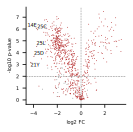

In [15]:
for var in ['rif']:

    pals = ['firebrick', stop_color]

    plt.figure(figsize = (1.8, 1.8))


    tdf = df.dropna(subset=['fc_'+var, 'p_'+var])

    features = ['fc_fit','fc_fit_x', 'fc_fit_y', 'fc_rif', 'fc_shx', 'fc_fitlong', 'fc_bcmlow', 'fc_bcmhigh', 'fc_fulow', 'fc_fuhigh', 'p_fit','p_fit_x', 'p_fit_y', 'p_rif', 'p_shx', 'p_fitlong', 'p_bcmlow', 'p_bcmhigh', 'p_fulow', 'p_fuhigh']
    x = tdf.loc[:, features]
    x = x.replace([-np.inf], x[~np.isinf(x)].min().min())
    x = x.replace([np.inf], x[~np.isinf(x)].max().max())

    ax = sns.scatterplot(x=x['fc_'+var], y=-np.log10(x['p_'+var]), hue=tdf['stop_codon'], palette=pals, linewidth=0, legend=False, s=.8)
    sns.despine()

    ax.axhline(2 , ls='--', c='gray', lw=.5)
    ax.axvline(0, ls='--', c='gray', lw=.5)
    #boundary = -.81689
    #boundary = tdf['fc_'+var].mean() - np.std(tdf['fc_'+var]) # 1 stdev from mean
    boundary = 0
    
    #ax.axvline(boundary, ls='--', c='coral', lw=1)

    ax.set_xlabel('log2 FC')
    ax.set_ylabel('-log10 p-value')
    
    print('percent less than boundary: '+str(sum(tdf['fc_'+var] < boundary) / len(tdf['fc_'+var])))
    #ax.set_xlim(-4, 4)

    #h,l = ax.get_legend_handles_labels()
    #l = ['', 'stop codon']
    #plt.legend(h[1:],l[1:],loc='lower right')
    
    from adjustText import adjust_text
    
    #selected = tdf[~df.stop_codon].sort_values(['p_'+var, 'fc_'+var], ascending=[True, True]).iloc[0:15, 0].append(tdf[~tdf.stop_codon].sort_values('fc_'+var, ascending=False).iloc[0:5, 0])
    #selected = tdf[~df.stop_codon].sort_values('fc_'+var).iloc[0:50, 0].append(tdf[~tdf.stop_codon].sort_values(['p_'+var, 'fc_'+var], ascending=[True, True]).iloc[0:20, 0])
    #selected = tdf[~df.stop_codon].sort_values('fc_'+var, ascending=False).iloc[0:5, 0].append(tdf[~df.stop_codon].sort_values('fc_'+var).iloc[0:5, 0])
    selected = tdf[~df.stop_codon].sort_values('fc_'+var).iloc[0:5, 0]
    #selected = selected.append(pd.DataFrame(['26Y', '22F']))
    #selected = pd.DataFrame(['10M', '21Y', '25C', '25D', '26V', '29K', '23P', '23W', '15G', '67V', '15Y', '26V', '27W', '15P', '12K', '33K', '26Y', '67A', '67C', '72L'])[0]
    #selected = pd.DataFrame(['26N', '67Q', '24L'])[0]
    
    texts=[]
    for index, row in tdf.loc[tdf['Label'].isin(list(selected)), ['Label', 'fc_'+var, 'p_'+var]].iterrows():

        texts.append(plt.text(row['fc_'+var], -np.log10(row['p_'+var]), row['Label']))  
        #plt.annotate(row['Label'], (row['fc_'+var], -np.log10(row['p_'+var])), textcoords="offset points", xytext=(x,y))
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='-', color='gray', alpha=.8, lw=.5))
    
    plt.savefig('svg/3c.svg', format="svg")
    
    plt.show()

/tmp/ipykernel_3116695/3410991887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['comean'] = np.log10((tdf[var+'_mean'] + tdf.lb_mean) / 2)


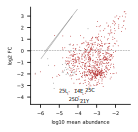

In [16]:
tdf['comean'] = np.log10((tdf[var+'_mean'] + tdf.lb_mean) / 2)

plt.figure(figsize = (1.8, 1.8))
ax = sns.scatterplot(y=tdf['fc_'+var], x=tdf['comean'], hue=tdf['stop_codon'], palette=pals, linewidth=0, legend=False, s=.8)
sns.despine()

ax.set_xlabel('log10 mean abundance')
ax.set_ylabel('log2 FC')

ax.axhline(0, ls='--', c='gray', lw=.5)

#h,l = ax.get_legend_handles_labels()
#l = ['', 'stop codon']
#plt.legend(h[1:],l[1:], loc='lower right')
#ax.legend(loc='best')

#selected = df[(df.t01 > 0) & (~df.stop_codon)].sort_values('lbrif_mean').iloc[0:3, 0]
for index, row in tdf.loc[tdf['Label'].isin(list(selected)), ['Label', 'comean', 'fc_'+var]].iterrows():
    texts.append(plt.text(row['comean'], row['fc_'+var], row['Label']))  
    
    #plt.annotate(row['Label'], (row['comean'], row['fc_'+var]), textcoords="offset points", xytext=(x,y))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='-', color='gray', alpha=.8, lw=.5))

plt.savefig('svg/3d.svg', format="svg")
plt.show()

<Figure size 792x648 with 0 Axes>

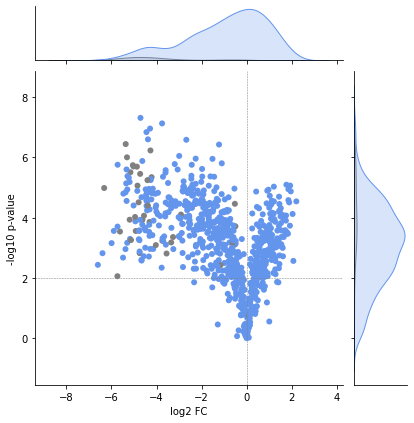

In [7]:
for var in ['fit']:

    pals = ['cornflowerblue', stop_color]

    plt.figure(figsize = (11, 9))


    tdf = df.dropna(subset=['fc_'+var, 'p_'+var])

    features = ['fc_fit','fc_fit_x', 'fc_fit_y', 'fc_rif', 'fc_shx', 'fc_fitlong', 'fc_bcmlow', 'fc_bcmhigh', 'fc_fulow', 'fc_fuhigh', 'p_fit','p_fit_x', 'p_fit_y', 'p_rif', 'p_shx', 'p_fitlong', 'p_bcmlow', 'p_bcmhigh', 'p_fulow', 'p_fuhigh']
    x = tdf.loc[:, features]
    x = x.replace([-np.inf], x[~np.isinf(x)].min().min())
    x = x.replace([np.inf], x[~np.isinf(x)].max().max())

    ax = sns.jointplot(x=x['fc_'+var], y=-np.log10(x['p_'+var]), hue=tdf['stop_codon'], palette=pals, linewidth=0, legend=False)
    sns.despine()
    
    ax = ax.ax_joint
    ax.axhline(2 , ls='--', c='gray', lw=.5)
    ax.axvline(0, ls='--', c='gray', lw=.5)
    
    ax.set_xlabel('log2 FC')
    ax.set_ylabel('-log10 p-value')
    #ax.set_xlim(-4, 4)

    #h,l = ax.get_legend_handles_labels()
    #l = ['', 'stop codon']
    #plt.legend(h[1:],l[1:],loc='lower right')

    #selected = tdf[~df.stop_codon].sort_values(['p_'+var, 'fc_'+var], ascending=[True, True]).iloc[0:15, 0].append(tdf[~tdf.stop_codon].sort_values('fc_'+var, ascending=False).iloc[0:5, 0])
    #selected = tdf[~df.stop_codon].sort_values('fc_'+var).iloc[0:50, 0].append(tdf[~tdf.stop_codon].sort_values(['p_'+var, 'fc_'+var], ascending=[True, True]).iloc[0:20, 0])
    #selected = tdf[~df.stop_codon].sort_values('fc_'+var, ascending=False).iloc[0:50, 0]
    #selected = selected.append(pd.DataFrame(['26Y', '22F']))
    #selected = pd.DataFrame(['10M', '21Y', '25C', '25D', '26V', '29K', '23P', '23W', '15G', '67V', '15Y', '26V', '27W', '15P', '12K', '33K', '26Y', '67A', '67C', '72L'])
    selected = pd.DataFrame(['29C', '29H', '63P'])
    for index, row in tdf.loc[tdf['Label'].isin(list(selected[0])), ['Label', 'fc_'+var, 'p_'+var]].iterrows():
        x = 0
        y = 5
        #if (row['Label'] == '70K') or (row['Label'] == '19H'): 
        #    x = 4
        #    y = -5
        plt.annotate(row['Label'], (row['fc_'+var], -np.log10(row['p_'+var])), textcoords="offset points", xytext=(x,y))

In [34]:
xs = 'fc_fulow'
ys = 'fc_bcmhigh'
asc = True

pals=['burlywood', stop_color]

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x=df[xs], y=df[ys], hue=df['stop_codon_x'], palette=pals, linewidth=0, legend=False)
sns.despine()

ax.set_xlabel(xs)
ax.set_ylabel(ys)

ax.axhline(0, ls='--', c='gray', lw=.5)
ax.axvline(0, ls='--', c='gray', lw=.5)

#h,l = ax.get_legend_handles_labels()
#l = ['', 'stop codon']
#plt.legend(h[1:],l[1:])

#selected = df[~df.stop_codon_x].sort_values(ys, ascending=asc).iloc[0:20, 0]
#selected = selected.append(pd.DataFrame(['26Y', '16V']))
#for index, row in df.loc[df['Label'].isin(list(selected)), ['Label', xs, ys]].iterrows():
#    x, y = (2, 5)
#    if row['Label'] == '21Y':
#        x, y = (2, -8)
#    plt.annotate(row['Label'], (row[xs], row[ys]), textcoords="offset points", xytext=(x,y))

In [ ]:
#pairplot/jointplot

In [3]:
features = ['fc_fit', 'fc_rif', 'fc_bcmhigh', 'fc_fulow']
#features = ['fc_fit','fc_rif', 'fc_shx', 'fc_bcmhigh', 'fc_fulow']
x = df.loc[:, features]
x = x.replace([-np.inf, np.inf], np.nan).dropna()
#x = x.replace([-np.inf], x[~np.isinf(x)].min().min())
#x = x.replace([np.inf], x[~np.isinf(x)].max().max())

x = x.subtract(x.mean(axis=0), axis=1).divide(x.std(axis=0), axis=1)

tdf = pd.DataFrame(x, columns=features)
tdf.columns = [n[3:] for n in list(tdf.columns)]
tdf['stop_codon'] = df['stop_codon']
#tdf['num'] = df['num']

In [4]:
tdf.columns = ['Fitness', 'RIF', 'BCM', '5FU', 'stop_codon']

In [20]:
stats.pearsonr(tdf[~tdf.stop_codon].loc[:, '5FU'], tdf[~tdf.stop_codon].loc[:, 'BCM'])

(0.44561027272586495, 2.5535239746071318e-36)

In [21]:
from scipy import stats
def r(x, y):
    return stats.pearsonr(x, y)[1]

In [17]:
print(r(tdf[~tdf.stop_codon].loc[:, '5FU'], tdf[~tdf.stop_codon].loc[:, 'Fitness']))
print(r(tdf[~tdf.stop_codon].loc[:, '5FU'], tdf[~tdf.stop_codon].loc[:, 'RIF']))
print(r(tdf[~tdf.stop_codon].loc[:, '5FU'], tdf[~tdf.stop_codon].loc[:, 'BCM']))

#plt.text(1, 1E4, 'Pearson R={:.2f}'.format(r(g.iloc[:, 1], g.iloc[:, 2])))

-0.5525863343993371
0.1435022993610097
0.44561027272586495


In [22]:
print(r(tdf[~tdf.stop_codon].loc[:, '5FU'], tdf[~tdf.stop_codon].loc[:, 'Fitness']))
print(r(tdf[~tdf.stop_codon].loc[:, '5FU'], tdf[~tdf.stop_codon].loc[:, 'RIF']))
print(r(tdf[~tdf.stop_codon].loc[:, '5FU'], tdf[~tdf.stop_codon].loc[:, 'BCM']))

#plt.text(1, 1E4, 'Pearson R={:.2f}'.format(r(g.iloc[:, 1], g.iloc[:, 2])))

1.2090323534860229e-58
0.00011408190739784127
2.5535239746071318e-36


In [5]:
x_vars = ["Fitness", 'RIF', 'BCM']
y_vars = ["5FU"]
g = sns.PairGrid(tdf[~tdf.stop_codon].iloc[:, :-1], x_vars=x_vars, y_vars=y_vars)

#g.map_upper(sns.scatterplot, color='midnightblue', size=.2, linewidth=0, alpha=.4)
g.map_diag(sns.kdeplot, color='gray')
#g.map_diag(None)
#g.map_lower(sns.kdeplot, color='firebrick')
g.map_offdiag(sns.regplot, color='lightsteelblue', line_kws={'linewidth':.5, 'color':'steelblue'}, scatter_kws={'s':.8, 'linewidth':0})

g.fig.set_size_inches(3, 1)

#g.map_lower(sns.kdeplot)
#g.map(sns.histplot, bins=100, color='firebrick')
  
sns.despine()

lim = 3.5
g.set(xlim=(-lim, lim), ylim=(-lim, lim))

#for ax in g.axes.ravel():
#    if ax:
#        ax.axhline(0, ls='--', c='gray', lw=.5)
#        ax.axvline(0, ls='--', c='gray', lw=.5)
#        ax.axhline(2, ls='--', c='gray', lw=.3)
#        ax.axvline(2, ls='--', c='gray', lw=.3)
#        ax.axhline(-2, ls='--', c='gray', lw=.3)
#        ax.axvline(-2, ls='--', c='gray', lw=.3)
        
plt.savefig('svg/4a.svg', format="svg")

In [89]:
#with sns.plotting_context(font_scale=1.5):
plt.rcParams["axes.labelsize"] = 15

g = sns.PairGrid(tdf[~tdf.stop_codon].iloc[:, :-1], corner=True)

#g.map_upper(sns.scatterplot, color='midnightblue', size=.2, linewidth=0, alpha=.4)
g.map_diag(sns.kdeplot, color='gray')
g.map_lower(sns.kdeplot, color='firebrick')

#g.map_lower(sns.kdeplot)
#g.map(sns.histplot, bins=100, color='firebrick')
  
sns.despine()

lim = 3.5
g.set(xlim=(-lim, lim), ylim=(-lim, lim))

for ax in g.axes.ravel():
    if ax:
        ax.axhline(0, ls='--', c='gray', lw=.5)
        ax.axvline(0, ls='--', c='gray', lw=.5)
        ax.axhline(2, ls='--', c='gray', lw=.3)
        ax.axvline(2, ls='--', c='gray', lw=.3)
        ax.axhline(-2, ls='--', c='gray', lw=.3)
        ax.axvline(-2, ls='--', c='gray', lw=.3)

In [26]:
#zscore data before clustering/inter screen comparisons

features = ['fc_fit', 'fc_rif', 'fc_bcmlow', 'fc_bcmhigh', 'fc_fulow', 'fc_fuhigh']

tdf = df.dropna()

x = tdf.loc[:, features]
x = x.replace([-np.inf], x[~np.isinf(x)].min().min())
x = x.replace([np.inf], x[~np.isinf(x)].max().max())
x = x.subtract(x.mean(axis=0), axis=1).divide(x.std(axis=0), axis=1) #zcore
#x = (2*x.subtract(x.min(axis=0), axis=1)).divide(x.max(axis=0).subtract(x.min(axis=0))) - 1

y = tdf.loc[:,['Label']].values

x.columns = ['Fitness', 'Rif', 'BCM-low', 'BCM-high', '5FU-low', '5FU-high']

-1.1071242369071939


-0.8662600617540556


0.08141666191636797


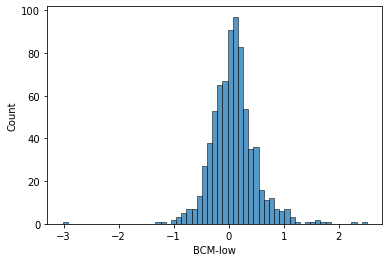

0.11217786174065618


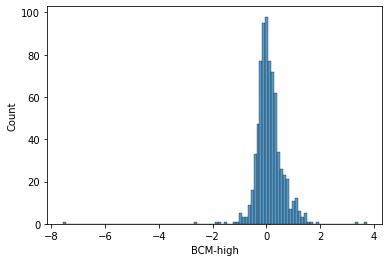

0.2944532473466321


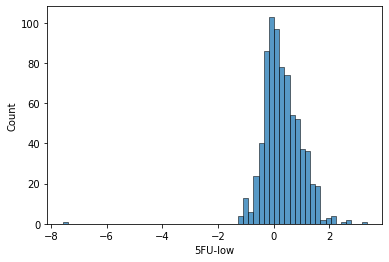

-1.1008111342576674


In [23]:
for i, row in x.T.iterrows():
    sns.histplot(row)
    print(row.mean())
    plt.show()

248 14 99 50


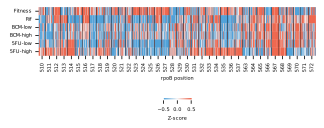

In [29]:
plt.figure(figsize = (4, 2))

a=248
b=14
c=99
d=50

cmap = sns.diverging_palette(a, b, s=c, l=d, n=100, center="light")
ax = sns.heatmap(x.T, center=0, cmap=cmap, vmin=-2, vmax=2, cbar_kws={'label': 'Z-score', 'shrink':.1, 'orientation':'horizontal', 'pad':.4})

ax.set_xlabel('$\it{rpoB}$ position')
ax.set_ylabel('')

v = np.array(tdf.num)
ls = list(np.where(v[:-1] != v[1:])[0])
ax.vlines(ls, *ax.get_ylim(), linewidths=.4, color='k')

#ax1.set_xlim([-1,63])
#ax1.set_xticks(range(0, 63, 1))
#ax1.set_xlim([0, 21])
ls_ticks = [l - 10 for l in ls]
ls_ticks.append(ls_ticks[-1] + 20)

ax.set_xticks(ls_ticks)
ax.set_xticklabels(np.unique(v) + 500)
plt.savefig('svg/e.svg', format="svg")

print(str(a)+' '+str(b)+' '+str(c)+' '+str(d))

248 14 99 50


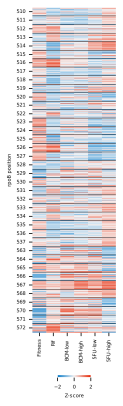

In [39]:
plt.figure(figsize = (1.5, 8))

a=248
b=14
c=99
d=50

cmap = sns.diverging_palette(a, b, s=c, l=d, n=100, center="light")
ax = sns.heatmap(x, center=0, cmap=cmap, vmin=-2, vmax=2, cbar_kws={'label': 'Z-score', 'shrink':.4, 'orientation':'horizontal', 'pad':.1})

ax.set_ylabel('$\it{rpoB}$ position')
ax.set_xlabel('')

v = np.array(tdf.num)
ls = list(np.where(v[:-1] != v[1:])[0])
ax.hlines(ls, *ax.get_xlim(), linewidths=.4, color='k')

#ax1.set_xlim([-1,63])
#ax1.set_xticks(range(0, 63, 1))
#ax1.set_xlim([0, 21])
ls_ticks = [l - 10 for l in ls]
ls_ticks.append(ls_ticks[-1] + 20)

ax.set_yticks(ls_ticks)
ax.set_yticklabels(np.unique(v) + 500)
plt.savefig('svg/e.svg', format="svg")

print(str(a)+' '+str(b)+' '+str(c)+' '+str(d))

In [145]:
features = ['fc_fit', 'fc_rif', 'fc_bcmhigh', 'fc_fulow']

tdf = df.dropna()
tdf = tdf[~tdf.stop_codon]

x = tdf.loc[:, features]
x = x.replace([-np.inf], x[~np.isinf(x)].min().min())
x = x.replace([np.inf], x[~np.isinf(x)].max().max())
x = x.subtract(x.mean(axis=0), axis=1).divide(x.std(axis=0), axis=1)

#x.columns = [n[3:] for n in list(x.columns)]

In [91]:
#by position
y = tdf['num'].values
x['num'] = y
x = x.melt(id_vars=['num']).groupby(['num', 'variable']).mean().reset_index().pivot(index='num', columns='variable')

In [146]:
#by substitution
y = tdf['Label'].values
x.index = y

In [147]:
#cmap = sns.diverging_palette(a, b, s=c, l=d, n=100, center="light")

high_vars = x.loc[x.var(axis=1).sort_values(ascending=False).head(30).index,:]
    
sns.clustermap(high_vars, cmap='coolwarm', vmin=-3, vmax=3)

In [12]:
from sklearn.decomposition import PCA

In [64]:
features = ['fc_fit','fc_fit_x', 'fc_fit_y', 'fc_rif', 'fc_shx', 'fc_fitlong', 'fc_bcmlow', 'fc_bcmhigh', 'fc_fulow', 'fc_fuhigh']

tdf = df.dropna()

x = tdf.loc[:, features]
x = x.replace([-np.inf], x[~np.isinf(x)].min().min())
x = x.replace([np.inf], x[~np.isinf(x)].max().max())
x = x.subtract(x.mean(axis=0), axis=1).divide(x.std(axis=0), axis=1)

y = tdf.loc[:,['Label']].values

In [98]:
x.columns

Index(['fc_fit', 'fc_fit_x', 'fc_fit_y', 'fc_rif', 'fc_shx', 'fc_fitlong',
       'fc_bcmlow', 'fc_bcmhigh', 'fc_fulow', 'fc_fuhigh'],
      dtype='object')

In [108]:
xt = x.iloc[:, [0, 3, 4, 6, 7, 8, 9]]
xt = xt.values
#x = StandardScaler().fit_transform(x)

In [111]:
c = 3
pca = PCA(n_components=c)

principalComponents = pca.fit_transform(xt)
final = pd.DataFrame(data = principalComponents
             , columns = ['p'+ str(l) for l in list(range(c))])

In [112]:
pca.explained_variance_ratio_

array([0.3236281 , 0.20295039, 0.14693837])

In [113]:
final['Label'] = tdf.reset_index()['Label']
p = tdf.merge(final, on='Label')

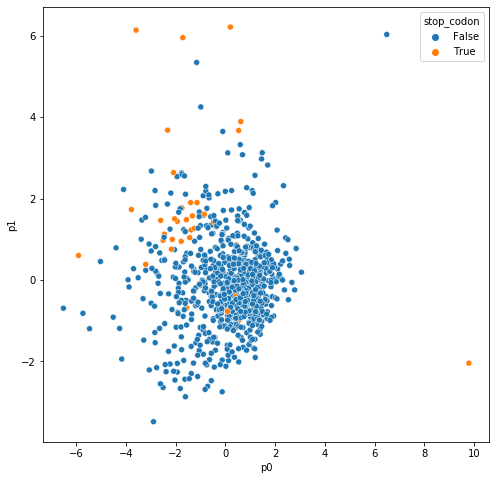

In [116]:
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x='p0', y='p1', hue='stop_codon', data=p)

ax.grid()

In [120]:
from sklearn.manifold import TSNE

In [130]:
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(xt)
tsne = pd.DataFrame(data = tsne
             , columns = ['p'+ str(l) for l in list(range(c))])

In [131]:
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x=tsne.loc[:,'p1'], y=tsne.loc[:,'p2'])

ax.grid()

In [132]:
tsne

p0         p1        p2
0    3.218853   3.643197  1.463694
1    2.843384  -0.544966 -3.961367
2    3.332309  -4.322628 -2.227736
3    4.139167   1.258671  3.782988
4    0.348023  -0.567222  6.532058
..        ...        ...       ...
752 -6.541312  -1.402787 -3.644502
753 -3.091529   1.038976 -3.640131
754 -0.088662  -0.866380  8.516043
755 -6.125300  -2.865610 -4.420202
756  2.339091 -10.871190  6.164175

[757 rows x 3 columns]

In [133]:
tsne['Label'] = tdf.reset_index()['Label']
p = tdf.merge(tsne, on='Label')

In [134]:
plt.figure(figsize = (8, 14))

pp = p.pivot(index='num', columns='AA', values='p0')

ax = sns.heatmap(pp[table], cbar_kws={'label': 'log2 FC', 'shrink':0.5, 'orientation':'horizontal'})

ax.set_ylabel('Position (5--)')
ax.set_xlabel('Amino acid')
ax.vlines([1, 4, 10, 13, 15, 17, 19, 21], *ax.get_ylim())

ax1 = ax.twiny()
#ax1.set_xlim([-1,63])
#ax1.set_xticks(range(0, 63, 1))
ax1.set_xlim([0, 21])
ax1.set_xticks([2.5, 7, 11.5, 14, 16, 18, 20])
#ax1.set_xticklabels(target[37:55])
ax1.set_xticklabels(['basic', 'aliphatic', 'aromatic', 'acidic', 'hydroxylic', 'sulfur', 'amidic'])

plt.show()